In [ ]:
# Instalando e atualizando as bibliotecas necessárias
!pip install pyDOE
!pip install -U seaborn

In [7]:
# Importando RASD Toolbox
from RASD_TOOLBOX import *
# Importando Numpy toolbox
import numpy as n

In [48]:
w = ['NORMAL', 0.25, 0.025]
P = ['NORMAL', 10.2, 1.12]
Fy = ['NORMAL', 40.3, 4.64]
#POP = ['10000']

POP = np.arange(10,10000, 100).tolist()

SETUP = {'N_REP': len(POP),
        'POP': POP,
        'N_G': 1,
        'D': 3,
        'VARS': [w, P, Fy],
        'MODEL': 'MCS'}

In [49]:
def OBJ(X):
    w = X[0]
    P = X[1]
    Fy = X[2]
    

    # STATE LIMIT FUNCTION
    
    R_0 = 80 * Fy
    S_0 = 54 * P + 5832 * w
    G_0 = S_0 - R_0

    R = [R_0] 
    S = [S_0] 
    G = [G_0]


    return R, S, G

In [50]:
RESULTS_TEST = RASD_STOCHASTIC(SETUP, OBJ)

In [55]:
RESULTS_TEST[0]['TOTAL RESULTS']

,X_0,X_1,X_2,R_0,S_0,G_0,I_0
0,0.261726,9.776072,41.154432,3292.354582,2054.294897,-1238.059685,0.0
1,0.213287,11.975145,44.501329,3560.106289,1890.545394,-1669.560895,0.0
2,0.236881,10.693220,43.883999,3510.719911,1958.923232,-1551.796679,0.0
3,0.224653,13.715258,39.849701,3187.976045,2050.800201,-1137.175843,0.0
4,0.265194,11.354849,42.233791,3378.703252,2159.771945,-1218.931307,0.0
5,0.219711,10.776212,42.258183,3380.654607,1863.271451,-1517.383156,0.0
6,0.259413,10.315855,37.143125,2971.449978,2069.953686,-901.496293,0.0
7,0.263384,11.048248,45.920505,3673.640382,2132.660692,-1540.979690,0.0
8,0.281702,11.016536,42.115487,3369.238934,2237.781206,-1131.457728,0.0
9,0.226680,10.143966,40.316709,3225.336759,1869.772669,-1355.564090,0.0


In [56]:
RESULTS_TEST

[{'TOTAL RESULTS':         X_0        X_1        X_2          R_0          S_0          G_0  I_0
  0  0.261726   9.776072  41.154432  3292.354582  2054.294897 -1238.059685  0.0
  1  0.213287  11.975145  44.501329  3560.106289  1890.545394 -1669.560895  0.0
  2  0.236881  10.693220  43.883999  3510.719911  1958.923232 -1551.796679  0.0
  3  0.224653  13.715258  39.849701  3187.976045  2050.800201 -1137.175843  0.0
  4  0.265194  11.354849  42.233791  3378.703252  2159.771945 -1218.931307  0.0
  5  0.219711  10.776212  42.258183  3380.654607  1863.271451 -1517.383156  0.0
  6  0.259413  10.315855  37.143125  2971.449978  2069.953686  -901.496293  0.0
  7  0.263384  11.048248  45.920505  3673.640382  2132.660692 -1540.979690  0.0
  8  0.281702  11.016536  42.115487  3369.238934  2237.781206 -1131.457728  0.0
  9  0.226680  10.143966  40.316709  3225.336759  1869.772669 -1355.564090  0.0,
  'NUMBER OF FAILURES': [0.0],
  'PROBABILITY OF FAILURE': [0.0],
  'BETA INDEX': [4.419]},
 {'TOTAL R

In [57]:
RESULTS_TEST[0]['TOTAL RESULTS']

,X_0,X_1,X_2,R_0,S_0,G_0,I_0
0,0.261726,9.776072,41.154432,3292.354582,2054.294897,-1238.059685,0.0
1,0.213287,11.975145,44.501329,3560.106289,1890.545394,-1669.560895,0.0
2,0.236881,10.693220,43.883999,3510.719911,1958.923232,-1551.796679,0.0
3,0.224653,13.715258,39.849701,3187.976045,2050.800201,-1137.175843,0.0
4,0.265194,11.354849,42.233791,3378.703252,2159.771945,-1218.931307,0.0
5,0.219711,10.776212,42.258183,3380.654607,1863.271451,-1517.383156,0.0
6,0.259413,10.315855,37.143125,2971.449978,2069.953686,-901.496293,0.0
7,0.263384,11.048248,45.920505,3673.640382,2132.660692,-1540.979690,0.0
8,0.281702,11.016536,42.115487,3369.238934,2237.781206,-1131.457728,0.0
9,0.226680,10.143966,40.316709,3225.336759,1869.772669,-1355.564090,0.0


In [54]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'WIDTH': 0.40, 
                'HEIGHT': 0.20, 
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$x_0$ - $P_X (lb)$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',  
                'CHART COLOR': '#FEB625',
                'KDE': False,
                'DPI': 600, 
                'BINS' : 20,
                'EXTENSION': '.svg'}
# RESULTS X_0 VARIABLE
OPCOES_DADOS = {'DATASET': DADOS, 'COLUMN': 'X_0'}      
# CALL PLOT
RASD_PLOT_1(OPCOES_DADOS, OPCOES_GRAFICAS)

NameError: name 'DADOS' is not defined

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.300, 
                'HEIGHT': 0.150,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 16,
                'Y AXIS SIZE': 16,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'LOC LEGEND': 'lower right',
                'TITLE LEGEND': 'Failure index ($I$):'}
# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'HUE VALUE': 'I_0'}    
# CALL PLOT
RASD_PLOT_2(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.20, 
                'HEIGHT': 0.10,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'G VALUE': 'G_0',
                'TRANSPARENCY': 0.8,
                'COLOR MAP': 'viridis'}


# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_3(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
plt.hist(RESULTS_TEST[0]['TOTAL RESULTS']['R_0'], bins=50, label='a', alpha=0.5)
plt.hist(RESULTS_TEST[0]['TOTAL RESULTS']['S_0'], bins=50, label='b', alpha=0.5)

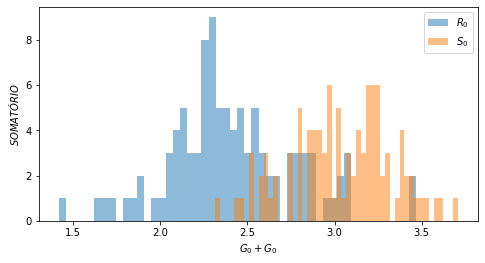

In [8]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X DATA': 'S_0',
                    'Y DATA': 'R_0',
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': '$G_0 + G_0$',
                    'Y AXIS LABEL': '$SOMATÓRIO$',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'C VALUE': 'G_0',
                    'TRANSPARENCY': 0.8,
                    'COLOR MAP': 'viridis',
                    'BINS': '50',
                    'ALPHA': '0.5'}

# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_4(OPCOES_DADOS, OPCOES_GRAFICAS)

In [42]:
RESULTS_TEST[0]['TOTAL RESULTS']

,X_0,X_1,X_2,R_0,S_0,G_0,I_0
0,0.272521,9.582935,40.703030,3256.242397,2106.820662,-1149.421735,0.0
1,0.292102,9.432674,41.889707,3351.176550,2212.905513,-1138.271037,0.0
2,0.253504,8.367000,44.034110,3522.728774,1930.253961,-1592.474814,0.0
3,0.258557,9.576463,36.132423,2890.593875,2025.033734,-865.560141,0.0
4,0.261010,10.110008,46.039597,3683.167742,2068.150656,-1615.017086,0.0
...,...,...,...,...,...,...,...
9995,0.290459,9.327773,35.569446,2845.555700,2197.655952,-647.899748,0.0
9996,0.244658,9.227486,47.298766,3783.901303,1925.128324,-1858.772980,0.0
9997,0.222989,10.722761,43.601636,3488.130843,1879.503671,-1608.627171,0.0
9998,0.261058,10.413127,39.004027,3120.322175,2084.797058,-1035.525117,0.0


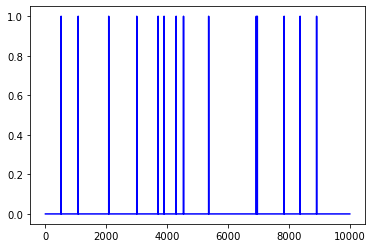

In [43]:
plt.plot( pd.Series(range(0,len(RESULTS_TEST[0]['TOTAL RESULTS']))), RESULTS_TEST[0]['TOTAL RESULTS']['I_0'], color='blue')

10000

In [33]:
RESULTS_TEST[0]['Address'] = (RESULTS_TEST[0]['TOTAL RESULTS'])

In [35]:
RESULTS_TEST[0]

{'TOTAL RESULTS':            X_0        X_1        X_2          R_0          S_0          G_0  \
 0     0.270140  10.236145  32.425446  2594.035699  2128.207333  -465.828366   
 1     0.256170  12.551301  39.541318  3163.305449  2171.756110  -991.549340   
 2     0.247581  10.647450  37.619566  3009.565266  2018.857419  -990.707848   
 3     0.283718  10.704818  35.346717  2827.737349  2232.706242  -595.031108   
 4     0.248217   9.518946  44.448118  3555.849408  1961.626111 -1594.223296   
 ...        ...        ...        ...          ...          ...          ...   
 9995  0.236104   9.020226  39.842835  3187.426819  1864.052707 -1323.374112   
 9996  0.251300  10.803425  31.956518  2556.521450  2048.968599  -507.552851   
 9997  0.239057  10.611252  39.714220  3177.137626  1967.187451 -1209.950175   
 9998  0.268105  12.085393  41.329567  3306.365382  2216.198666 -1090.166716   
 9999  0.228182  10.025755  40.270174  3221.613953  1872.146715 -1349.467238   
 
       I_0  
 0     0

In [83]:
RESULTS_TEST[99]['TOTAL RESULTS']['I_0'].head(10000).sum()

9.0

0.0
0.0
0.0
0.0
0.0
0.0
0.00010090817356205853
0.00020181634712411706
0.00020181634712411706
0.00020181634712411706
0.00020181634712411706
0.00020181634712411706
0.00020181634712411706
0.00020181634712411706
0.00020181634712411706
0.00020181634712411706
0.00020181634712411706
0.00020181634712411706
0.00020181634712411706
0.00020181634712411706
0.00020181634712411706
0.00020181634712411706
0.0003027245206861756
0.0003027245206861756
0.0003027245206861756
0.0003027245206861756
0.0003027245206861756
0.0004036326942482341
0.0004036326942482341
0.0004036326942482341
0.0004036326942482341
0.0005045408678102926
0.0005045408678102926
0.0005045408678102926
0.0005045408678102926
0.0005045408678102926
0.0005045408678102926
0.0005045408678102926
0.0005045408678102926
0.0005045408678102926
0.0005045408678102926
0.0005045408678102926
0.0005045408678102926
0.0005045408678102926
0.0005045408678102926
0.0005045408678102926
0.0005045408678102926
0.0005045408678102926
0.0005045408678102926
0.000504540867

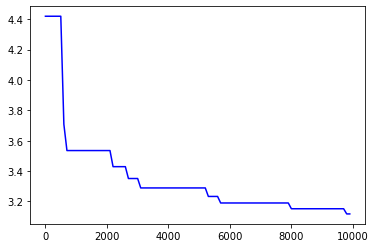

In [92]:
Bf = [ ]
Af = [ ]
c = 100
BETA_DF = pd.read_csv('RASD_TOOLBOX/beta_df.txt', delimiter = ";",  names = ['PF' ,'BETA'])

for i in POP:
   Af.append((RESULTS_TEST[len(POP)-1]['TOTAL RESULTS']['I_0'].head(i).sum())/max(POP)) # soma valores anteriores de I_0 e calcula PF

df = pd.DataFrame(Af,columns=['Pf']) #converte para DF

for i in range(len(POP)): #Salva os valores em um DF a cada 100 valores
    print(Af[i])
    Bf.append((BETA_DF['PF'].sub(Af[i]).abs().idxmin())/1000)
  
plt.plot(POP, Bf, color='blue')

#plt.plot( pd.Series(range(0,len(RESULTS_TEST[0]['TOTAL RESULTS']),c)), Bf, color='blue')

#plt.plot( pd.Series(range(0,len(RESULTS_TEST[0]['TOTAL RESULTS']))), RESULTS_TEST[0]['TOTAL RESULTS']['I_0'], color='blue')

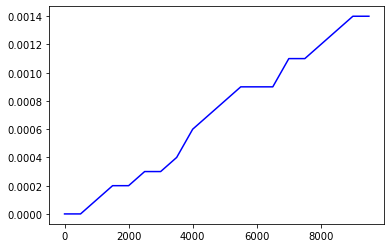

In [77]:
RESULTS_TEST[9]['PROBABILITY OF FAILURE']

[0.0]

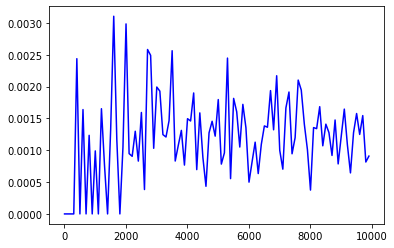

In [61]:
PF_AUX = []
BETA_AUX = []

for i in range (len(POP)):
    PF_AUX.append(RESULTS_TEST[i]['PROBABILITY OF FAILURE'][0])
    BETA_AUX.append(RESULTS_TEST[i]['BETA INDEX'][0])

plt.plot(POP, PF_AUX, color='blue')

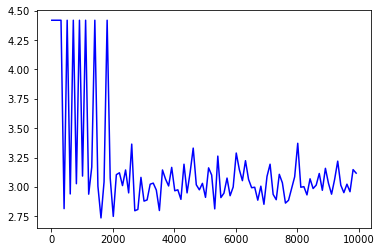

In [62]:
plt.plot(POP, BETA_AUX, color='blue')

In [90]:
(BETA_DF['PF'].sub(0.4996).abs().idxmin())/1000   

0.002

In [88]:
BETA_DF

,PF,BETA
0,1.0000,0.000
1,0.5000,0.000
2,0.4996,0.001
3,0.4992,0.002
4,0.4988,0.003
...,...,...
999996,0.0000,999.995
999997,0.0000,999.996
999998,0.0000,999.997
999999,0.0000,999.998
